## Image Data
Let's now explore a classification problem involving some *real* data.

First, let's import the required packages.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline

### MNIST data
We will be working with a very famous dataset of labelled images. 

To load the image data we will use one of Sklearn's set of existing data loaders, where Sklearn provides a number of toy datasets that can be used for exploring machine learning algorithms.

Let us load the data and visualise the first 100 images.

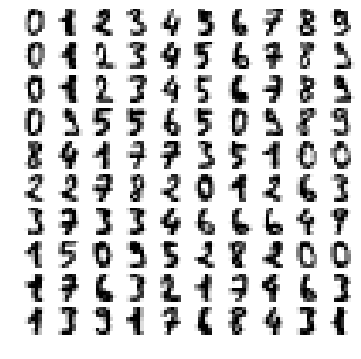

In [2]:
digits = datasets.load_digits()

rows, columns = 10, 10
_, axes = plt.subplots(rows, columns, figsize=(6,6))
for ax, image in zip(axes.flatten(), digits.images[:rows*columns]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)

The dataset consists of set of images of *handwritten* digits and their categories. The data in `digits.images` represents the values for each pixal in each $8x8$ image, while the values in `digits.target` look like this:

In [3]:
np.unique(digits.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Logistic regression on raw pixel data
Let's format the data, split into train and test datasets, train a logistic regression model on the raw pixel data, and evaluate on the test data. Note that we reshaped the images to match the expected format of an attributes matrix.

In [4]:
y = digits.target
X = digits.images.reshape((len(digits.images), -1))
X=(X-X.mean())/X.std()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

lr = LogisticRegression(C=0.01)
lr.fit(X_train,y_train);

print(lr.score(X_test, y_test))

0.9388888888888889


The output value is the *mean accuracy*, the fraction of test examples for which the model guesses the class correctly. $0$ is very bad, $1$ is very good.

Let's try a different model. A linear support vector classification model.

In [5]:
svc = SVC(kernel="linear", C=0.01)
svc.fit(X_train, y_train)
print(svc.score(X_test, y_test))

0.9722222222222222


### Introduction to grid search
For the logistic regression model, we chose the parameter `C` to be equal to $0.01$, but we do not yet know if this is the *best* value.

Similarly to when we performed model selection over the degree of the polynomial feature map in the polynomial regression model, we can perform model selection over the parameter `C` in the logistic regression model.

Let's perform model selection over the parameter `C` of the logistic regression classification model, but's let's introduce a useful tool from Sklearn to make things easier.

Run the following code.

In [6]:
# create our logistic regression
lr = LogisticRegression()

# specify the 'C' parameters to be searched over
params = {'C':[1e-2, 1e-1, 1e0, 1e1, 1e2]}

# instantiate a gridsearch
search = GridSearchCV(lr, params)

# find the best values of 'C'
search.fit(X_train, y_train)

# Print the best params and the mean accuracy
search.best_params_, search.best_score_

({'C': 1.0}, 0.9665970772442589)

The `GridSearchCV` uses *cross-validation* (to be covered in the lecture) to evaluate each value of the parameter `C` and then chooses the best one. Not by much, but the grid search has resulted in a model with a value of `C` that performs better than the one we chose originally.

The meaning of `C` will be covered further in the lecture.

### Feature relevance
Finally, let's quickly expore the idea of *feature relevance* in the context of image classification.

Run the following code.

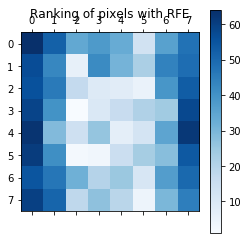

In [7]:
# Rank the raw pixel features
svc = SVC(kernel="linear", C=0.01)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)

# Visualise results
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

This whiteness of each pixel represents the relevance that pixel when it comes to determining the category of the image. 

We will discuss feature relevance in the lecture in more detail.